In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_json('C:/Users/Jillian/Desktop/Thinkful Data Files/reviews_Pet_Supplies_5.json.gz',compression='gzip',lines=True)

In [3]:
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,1223000893,"[0, 0]",3,I purchased the Trilogy with hoping my two cat...,"01 12, 2011",A14CK12J7C7JRK,Consumer in NorCal,Nice Distraction for my cats for about 15 minutes,1294790400
1,1223000893,"[0, 0]",5,There are usually one or more of my cats watch...,"09 14, 2013",A39QHP5WLON5HV,Melodee Placial,Entertaining for my cats,1379116800
2,1223000893,"[0, 0]",4,I bought the triliogy and have tested out all ...,"12 19, 2012",A2CR37UY3VR7BN,Michelle Ashbery,Entertaining,1355875200
3,1223000893,"[2, 2]",4,My female kitty could care less about these vi...,"05 12, 2011",A2A4COGL9VW2HY,Michelle P,Happy to have them,1305158400
4,1223000893,"[6, 7]",3,"If I had gotten just volume two, I would have ...","03 5, 2012",A2UBQA85NIGLHA,"Tim Isenhour ""Timbo""",You really only need vol 2,1330905600


In [4]:
df.columns

Index(['asin', 'helpful', 'overall', 'reviewText', 'reviewTime', 'reviewerID',
       'reviewerName', 'summary', 'unixReviewTime'],
      dtype='object')

In [ ]:
df['overall'].value_counts()

In [16]:
df['sentiment'] = np.where(df['overall'] > 3.0, 1, 0)

df['sentiment'].value_counts()

1    124248
0     33588
Name: sentiment, dtype: int64

In [18]:
df['review'] = df['reviewText'] + ' : ' + df['summary'] 

In [19]:
df_2 = df.drop(columns=['asin','helpful','overall','reviewText','reviewTime','reviewerID',
                       'reviewerName','summary','unixReviewTime'])

In [20]:
df_2.head()

,sentiment,review
0,0,I purchased the Trilogy with hoping my two cat...
1,1,There are usually one or more of my cats watch...
2,1,I bought the triliogy and have tested out all ...
3,1,My female kitty could care less about these vi...
4,0,"If I had gotten just volume two, I would have ..."


In [21]:
keywords = ['awful','bad','boring','disgusting','dislike','hate','worse','expensive',
           'gross','terrible','poor','crap','fail','stupid','annoying','cheap']

for key in keywords:
    df_2[str(key)] = df_2['review'].str.contains(
        str(key),
        case=False
    )

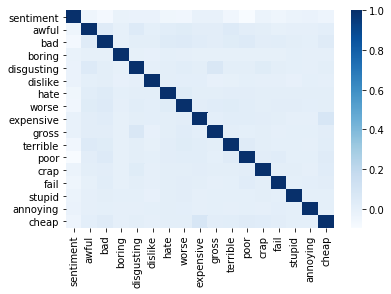

In [22]:
corr = df_2.corr()
sns.heatmap(corr, cmap='Blues')

In [23]:
data = df_2[keywords]
target = df_2['sentiment']

In [24]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 157836 points : 33488


In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[  1789,  31799],
       [  1689, 122559]], dtype=int64)

In [26]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(data, target)
y_pred = knn.predict(data)

In [27]:
confusion_matrix(target, y_pred)

array([[  4863,  28725],
       [  9511, 114737]], dtype=int64)

In [30]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1e9)
fit = lr.fit(data, target)

print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
y_pred = lr.predict(data)

C:\Users\Jillian\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Coefficients
[[-1.01933921 -0.58302665 -0.80706374 -0.60789759 -0.63021806 -0.51841117
  -0.96063128  0.00404329 -0.14750351 -1.02366751 -1.40010392 -0.46031955
  -0.76879036 -0.99154466 -0.39202477 -0.26837913]]
[1.43709904]


In [31]:
confusion_matrix(target, y_pred)

array([[   857,  32731],
       [   741, 123507]], dtype=int64)